In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'The BMI vs the charges paid')

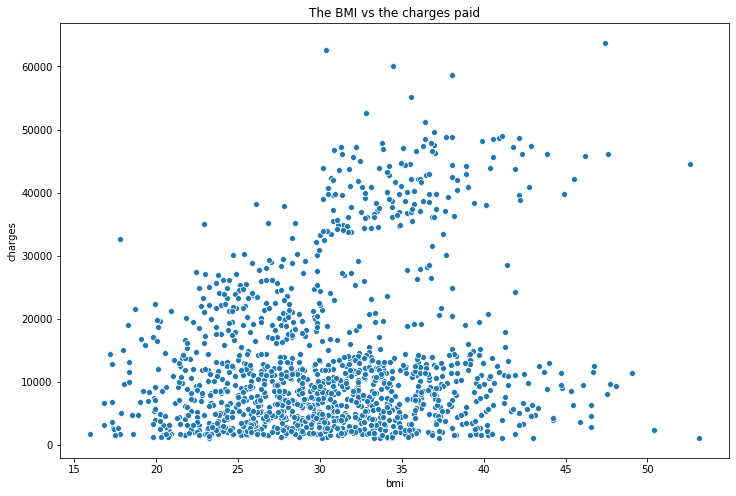

In [3]:
# BMI vs Charges
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['bmi'], y=data['charges'])
plt.title('The BMI vs the charges paid')

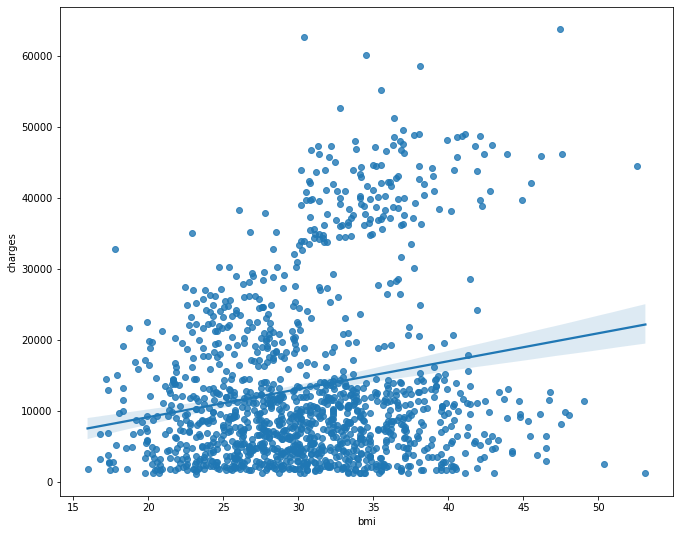

In [4]:
# TO add the line of best fit << Regression Line >> to the scatter above.
# Just change the scatterplot to REGPLOT
plt.figure(figsize=(11, 9))
sns.regplot(x=data['bmi'], y=data['charges'])

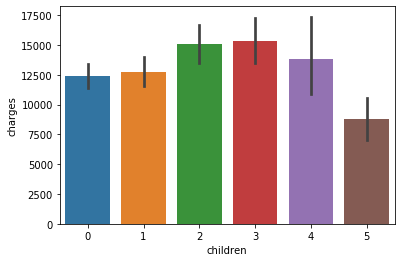

In [5]:
# 4 kids
# plt.figure(figsize=(10, 8))
sns.barplot(x=data['children'], y=data['charges'])

# Doesn't look good..

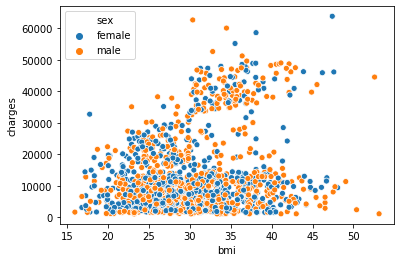

In [6]:
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['sex'])

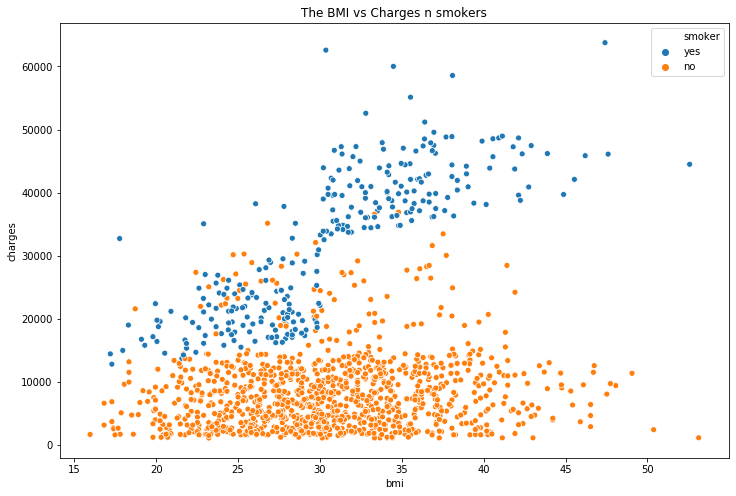

In [7]:
# Color coding when you have THREE variables
plt.figure(figsize=(12, 8))
plt.title('The BMI vs Charges n smokers')
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'])

<Figure size 864x720 with 0 Axes>

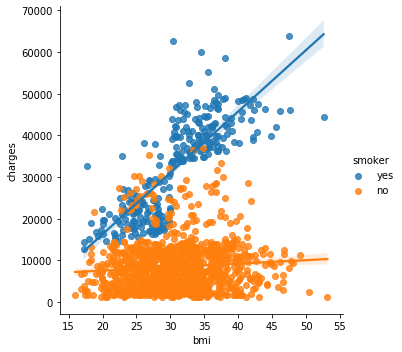

In [8]:
# Adding two regression lines to show the trends for smokers and non_smokers
plt.figure(figsize=(12, 10))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data)

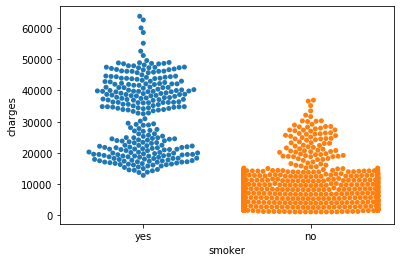

In [9]:
# Incorporating  a categorical in the X axis

sns.swarmplot(x=data['smoker'], y=data['charges'])

In [10]:
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

data['target'] = pd.factorize(data['species'])[0]
# data.head(120)

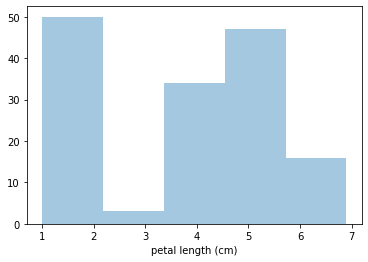

In [13]:
# Plotting a Histogram showing the variation in petal length of the flowers

sns.distplot(a=data['petal length (cm)'], kde=False)

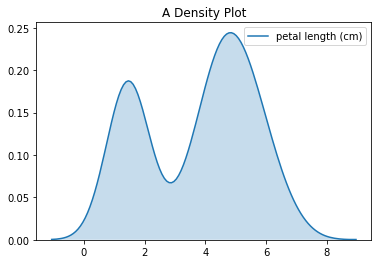

In [25]:
# Think of the below as a smoothened version of the above
# A DENSITY PLOT
plt.title('A Density Plot')
sns.kdeplot(data=data['petal length (cm)'], shade=True)

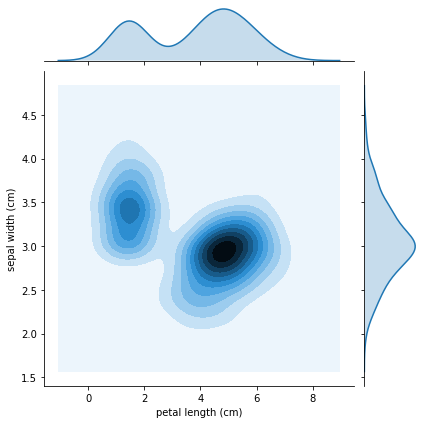

In [27]:
# THIS IS awesome 
# A 2D KDE

sns.jointplot(x = data['petal length (cm)'], y = data['sepal width (cm)'], kind='kde')

# The curves on the top and right are the 
# KDE for each axis

In [29]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [31]:
data.drop(['target'], axis=1, inplace=True)

In [36]:
d_seto = data[data['species'] == 'setosa']

d_seto.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
data.shape

(150, 5)

In [40]:
d_vers = data[data['species'] == 'versicolor']

d_virg = data[data['species'] == 'virginica']

# d_virg

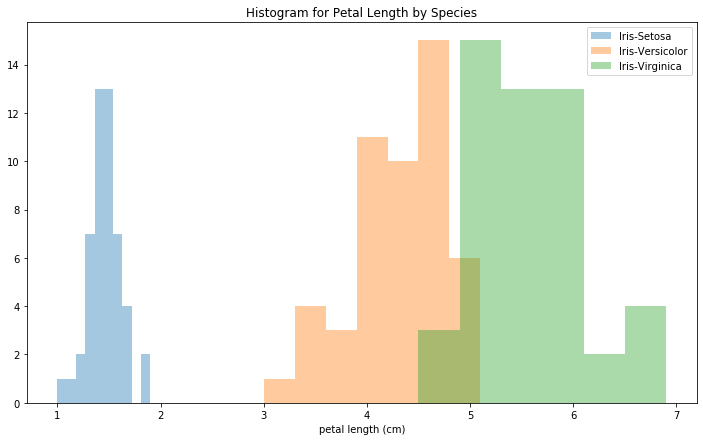

In [44]:
#  Combined histogram for all species petal length

plt.figure(figsize=(12, 7))

sns.distplot(a=d_seto['petal length (cm)'], label='Iris-Setosa', kde=False)
sns.distplot(a=d_vers['petal length (cm)'], label='Iris-Versicolor', kde=False)
sns.distplot(a=d_virg['petal length (cm)'], label='Iris-Virginica', kde=False)

plt.title('Histogram for Petal Length by Species')

plt.legend()

Text(0.5, 1.0, 'DIstributions of Petal Length by Species')

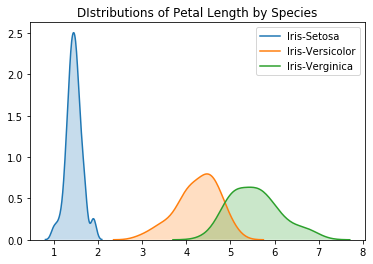

In [52]:
# KDE Plots by petal length for each
sns.kdeplot(data=d_seto['petal length (cm)'], label='Iris-Setosa', shade=True)
sns.kdeplot(data=d_vers['petal length (cm)'], label='Iris-Versicolor', shade=True)
sns.kdeplot(data=d_virg['petal length (cm)'], label='Iris-Verginica', shade=True)

plt.title('DIstributions of Petal Length by Species')